# 第四次作业
### 姓名：张家琪
### 班级：2020211601
### 学号：2020211178

# 作业内容

## （1）在（0，1）范围内随机设定5对(x,y)值（包含(0,0)和（1，1）），并利用其构建4阶拟合多项式，绘制离散点及拟合的多项式曲线

[0.    0.452 0.475 0.259 1.   ]
[0.    0.165 0.958 0.925 1.   ]
        4        3         2
-734.1 x + 1280 x - 641.6 x + 96.62 x - 2.465e-13


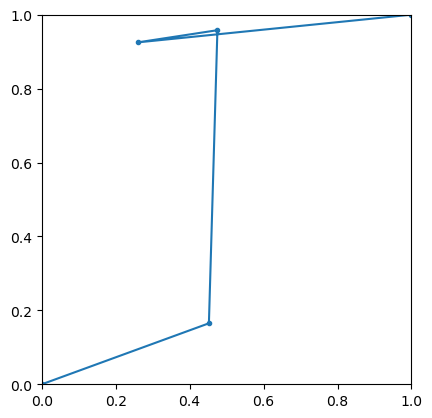

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# 随机选取5对(x,y)
x=np.zeros(5)
y=np.zeros(5)
for i in range(0,x.shape[0]):
    if i==0:
        x[i]=0
    elif i==x.shape[0]-1:
        x[i]=1
    else:
        random.seed(10+i) # 选取一个适合的seed，使每次随机都一样
        x[i]=round(random.random(),3)
print(x)

for j in range(0,y.shape[0]):
    if j==0:
        y[j]=0
    elif j==y.shape[0]-1:
        y[j]=1
    else:
        random.seed(20+j) # 选取一个适合的seed，使每次随机都一样
        y[j]=round(random.random(),3)
print(y)

# 拟合四阶多项式
z=np.poly1d(np.polyfit(x, y, 4))
print(z)

# 绘制拟合曲线
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.scatter(x, y, marker='.')
ax.plot(x, z(x),linestyle='-')
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

## （2）利用拟合多项式曲线作为变换函数对灰度图像进行处理，给出处理结果

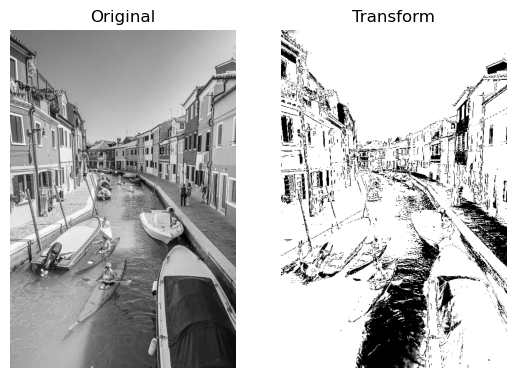

In [2]:
# 设定在量化为8bits的灰度图像上的映射
map_1=np.zeros(256)
x_map=np.linspace(0, 1, 256)
for i in np.arange(256):
    temp=z(x_map[i])
    if temp>1:
        map_1[i]=1
    elif temp<0:
        map_1[i]=0
    else:
        map_1[i]=temp
def f_1(x):
    return map_1[x]

# 输出图像
from skimage import io
img= io.imread("grey.bmp",as_gray=True)
img_map=np.frompyfunc(f_1,1,1)(img).astype(float)
plt.subplot(121)
plt.imshow(img,plt.cm.gray)
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(img_map,plt.cm.gray)
plt.axis('off')
plt.title('Transform')
plt.show()

## （3）从数学角度推导多项式拟合参数计算方法

多项式回归（Polynomial regression）是一种使用最小二乘法（least squares）计算最小误差，从而达成最完美拟合的方法。
\
以一阶多项式为例，一次函数$y=mx+b$，在已知两个点的情况下，我们可以对二元一次方程求解，得出$m$和$b$。
\
可是，如果我们现在已知三个点该怎么办呢？我们可以选择简单地忽略其中一个方程，继续用二元一次方程求解，或者可以选择另一种计算方法，将所有数据点都考虑在内。
\
首先，定义一个误差函数（residual function）：
$$r(x)=\sum\limits_{i=0}^{n}[y_i-f(x_i)]^2 $$
设定回归函数为0次函数$f(x)=c_0$，三个y值代入进去，比如$y=\{10,8,11\}$：
$$r(x)=(10-c_0)^2+(8-c_0)^2+(11-c_0)^2$$
展开之后，就能得到一个二次函数，选取这个二次函数导数为0的地方，就是$r(x)$，也就是误差最小的地方，$c_0$就能求解出来。这就是最小二乘法。
\
那么，如果$f(x)$为一次函数$f(x)=mx+b$，代入三个已知点，最终$r(x)$会是一个包括两个未知数$m$和$b$的多次函数，此时只需要分别对$m$和$b$求偏导，使$m$和$b$都等于0，也能求出来误差最小的回归函数。我们还可以推广到更普遍的形式，推理过程如下：
\
对于误差函数$$
r(x)=\sum\limits_{i=0}^{n}[y_i-(mx_i+b)]^2
$$
对两个未知数求偏导得：$$
\frac{\delta r}{\delta b}=\sum\limits_{i=0}^{n}2(b+mx_i-y_i) \\
\frac{\delta r}{\delta m}=\sum\limits_{i=0}^{n}2x_i(b+mx_i-y_i)
$$
使其偏导为0，移项得到：
$$
2bn+2m\sum\limits_{i=0}^{n}x_i=2\sum\limits_{i=0}^{n}y_i \\
2b\sum\limits_{i=0}^{n}x_i+2m\sum\limits_{i=0}^{n}x_i^2=2\sum\limits_{i=0}^{n}x_iy_i
$$
写成矩阵的形式，为：
$$
\begin{bmatrix}
n & \sum\limits_{i=0}^{n}x_i \\
\sum\limits_{i=0}^{n}x_i & \sum\limits_{i=0}^{n}x_i^2
\end{bmatrix}
\begin{bmatrix}
b \\
m
\end{bmatrix}
=
\begin{bmatrix}
\sum\limits_{i=0}^{n}y_i \\
\sum\limits_{i=0}^{n}x_iy_i
\end{bmatrix}
$$
对于更高次数的多项式，可以用同样的方法推广。推广到一般形式为：对于拟合到$m$阶的多项式
$$
f(x)=c_1x+c_2x^2+\cdots+c_mx^m+c_0
$$
有$n$个已知数据点，有矩阵：
$$
\begin{bmatrix}
n & \sum\limits_{i=0}^{n}x_i & \sum\limits_{i=0}^{n}x_i^2 & \cdots & \sum\limits_{i=0}^{n}x_i^m \\
\sum\limits_{i=0}^{n}x_i & \sum\limits_{i=0}^{n}x_i^2 & \sum\limits_{i=0}^{n}x_i^3 & \cdots & \sum\limits_{i=0}^{n}x_i^{m+1} \\
\sum\limits_{i=0}^{n}x_i^2 & \sum\limits_{i=0}^{n}x_i^3 & \sum\limits_{i=0}^{n}x_i^4 & \cdots & \sum\limits_{i=0}^{n}x_i^{m+2} \\
\vdots & \vdots & \vdots & & \vdots \\
\sum\limits_{i=0}^{n}x_i^m & \sum\limits_{i=0}^{n}x_i^{m+1} & \sum\limits_{i=0}^{n}x_i^{m+2} & \cdots & \sum\limits_{i=0}^{n}x_i^{2m}
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
\vdots \\
c_m
\end{bmatrix}
=
\begin{bmatrix}
\sum\limits_{i=0}^{n}y_i \\
\sum\limits_{i=0}^{n}x_iy_i \\
\sum\limits_{i=0}^{n}x_i^2y_i \\
\vdots \\
\sum\limits_{i=0}^{n}x_i^my_i
\end{bmatrix}
$$
由此，我们就可以求任意阶多项式的回归方程了。

## （4）利用Numpy线性代数工具箱求解多项式系数，与Numpy的polyfit函数的计算结果进行对比，看看两者是否一致。

In [3]:
# 对已求出的四阶拟合多项式进行手动求解
# 先求左侧的矩阵
matrix_1=np.zeros(25).reshape(5,5)
for i in range(0,matrix_1.shape[0]):
    for j in range(0,matrix_1.shape[1]):
        for k in x:
            matrix_1[i][j]+=pow(k,j+i)

In [4]:
matrix_1

array([[5.        , 2.186     , 1.49701   , 1.21689126, 1.09714663],
       [2.186     , 1.49701   , 1.21689126, 1.09714663, 1.04421265],
       [1.49701   , 1.21689126, 1.09714663, 1.04421265, 1.02031534],
       [1.21689126, 1.09714663, 1.04421265, 1.02031534, 1.00938845],
       [1.09714663, 1.04421265, 1.02031534, 1.00938845, 1.00435397]])

In [5]:
# 求右侧的矩阵
matrix_2=np.zeros(5)
for i in range(0,matrix_2.shape[0]):
    for j in range(0,5):
        matrix_2[i]+=pow(x[j],i)*y[j]

In [6]:
matrix_2.reshape(1,5)

array([[3.048     , 1.769205  , 1.31190884, 1.13397858, 1.05981805]])

In [7]:
# 计算多项式系数矩阵
from numpy.linalg import inv
c_matrix=np.matmul(inv(matrix_1),matrix_2)
for i in range(0,c_matrix.shape[0]):
    c_matrix[i]=round(c_matrix[i],2)

In [8]:
c_matrix

array([   0.  ,   96.62, -641.57, 1280.08, -734.13])

对比np.polyfit求出的四阶多项式$$
y=-734.1x^4+1280x^3-641.6x^2+96.63^x-2.465e-13
$$
可判断手动求解基本正确。